# Lab: Linear Programming

Lab associated with Module 9: Linear Programming

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/tmp/ipykernel_205214/1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.linalg import lu

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


***

### Section 1: Solving LP problem graphically

Let us see if we can solve the LP problem that we discussed in the lecture, graphically

In [5]:
X1 = np.linspace(0, 1000)

In [6]:
# X1 + X2 >= 200
# X2 = 200 - X1
X2 = 200 - X1

In [7]:
#2X1 + 3X2 <= 120
#X2 = (120 - 2X1)/2

In [8]:
X2x = X1[np.where(X2 > 0)[0]]
X2y = X2[np.where(X2 > 0)[0]]

In [9]:
# 9X1 + 6X2 <= 1556
# X2 = (1556 - 9X1)/6

X3 = (1556 - 9*X1)/6

X3x = X1[np.where(X3 > 0)[0]]
X3y = X3[np.where(X3 > 0)[0]]

In [10]:
# 12X1 + 16X2 <= 2880
# X2 = (2880 - 12X1)/16

X4 = (2880 - 12*X1)/16

X4x = X1[np.where(X4 > 0)[0]]
X4y = X4[np.where(X4 > 0)[0]]

Let us plot these constraints

Text(0, 0.5, 'X2')

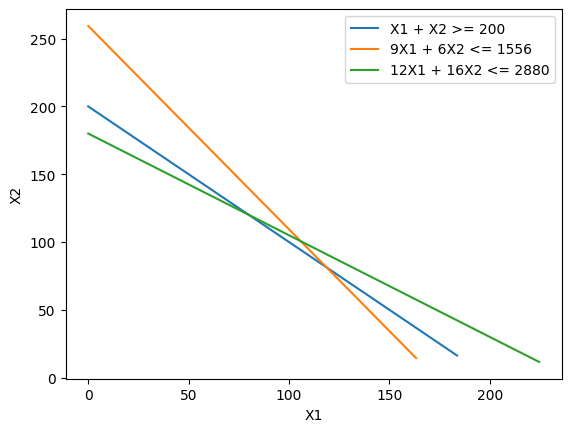

In [11]:
plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

plt.legend(['X1 + X2 >= 200', '9X1 + 6X2 <= 1556', '12X1 + 16X2 <= 2880'])
plt.xlabel('X1')
plt.ylabel('X2')

Let us see if we can plot the feasible region

Text(0, 0.5, 'X2')

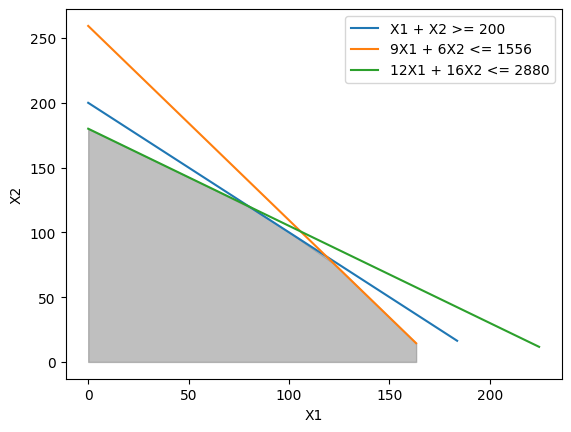

In [12]:
plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

# Fill feasible region
y5 = np.minimum(X2y[0:9], X3y)
y6 = np.minimum(y5, X4y[0:9])
plt.fill_between(X4x[0:9], y6, color='grey', alpha=0.5)

plt.legend(['X1 + X2 >= 200', '9X1 + 6X2 <= 1556', '12X1 + 16X2 <= 2880'])
plt.xlabel('X1')
plt.ylabel('X2')

Okay, now we have the constraints, let us see if we can plot the various values of objective function

Text(0, 0.5, 'X2')

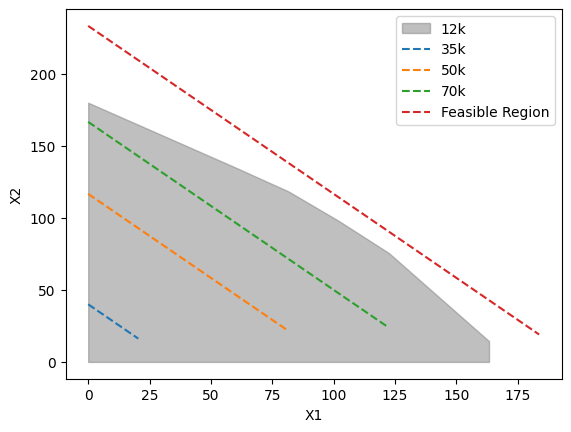

In [13]:
# 350X1 + 300X2
# X2 = (N - 350X1)/300
N1 = 12000
N2 = 35000
N3 = 50000
N4 = 70000

X5_1 = (N1 - 350*X1)/300
X5_2 = (N2 - 350*X1)/300
X5_3 = (N3 - 350*X1)/300
X5_4 = (N4 - 350*X1)/300

# Fill feasible region
y5 = np.minimum(X2y[0:9], X3y)
y6 = np.minimum(y5, X4y[0:9])
plt.fill_between(X4x[0:9], y6, color='grey', alpha=0.5)

# No need to plot the constraints

#plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
#plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
#plt.plot(X4x, X4y, label=r'$2y\leq25-x$')

X5_1x = X1[np.where(X5_1 > 0)[0]]
X5_1y = X5_1[np.where(X5_1 > 0)[0]]

X5_2x = X1[np.where(X5_2 > 0)[0]]
X5_2y = X5_2[np.where(X5_2 > 0)[0]]

X5_3x = X1[np.where(X5_3 > 0)[0]]
X5_3y = X5_3[np.where(X5_3 > 0)[0]]

X5_4x = X1[np.where(X5_4 > 0)[0]]
X5_4y = X5_4[np.where(X5_4 > 0)[0]]

plt.plot(X5_1x, X5_1y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_2x, X5_2y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_3x, X5_3y, '--', label=r'$2y\leq25-x$')
plt.plot(X5_4x, X5_4y, '--', label=r'$2y\leq25-x$')

plt.legend(['12k', '35k', '50k', '70k','Feasible Region'])
plt.xlabel('X1')
plt.ylabel('X2')

In [14]:
X1 = np.linspace(0, 100)


In [15]:
X2 = 20 - X1

In [16]:
X2x = X1[np.where(X2 > 0)[0]]
X2y = X2[np.where(X2 > 0)[0]]

In [17]:
X3 = 12 - X1/1

In [18]:
X3x = X1[np.where(X3 > 0 )[0]]
X3y = X3[np.where(X3 > 0 )[0]]


In [19]:
X4 = 16 - X1/1

In [20]:
X4x = X1[np.where(X4 > 0 )[0]]
X4y = X4[np.where(X4 > 0 )[0]]

Text(0, 0.5, 'X2')

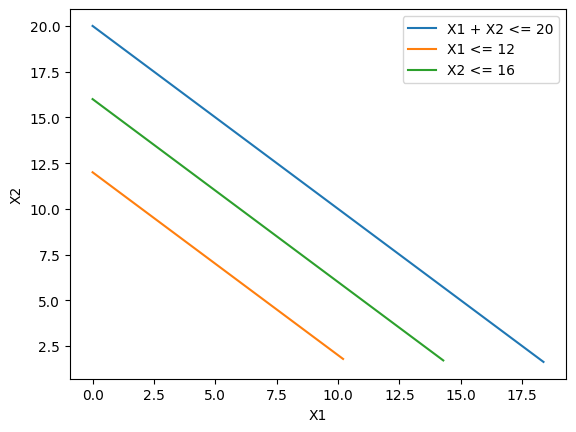

In [21]:
plt.plot(X2x, X2y, label=r'$2y\leq25-x$')
plt.plot(X3x, X3y, label=r'$2y\leq25-x$')
plt.plot(X4x, X4y, label=r'$2y\leq25-x$')



plt.legend(['X1 + X2 <= 20', 'X1 <= 12', 'X2 <= 16'])
plt.xlabel('X1')
plt.ylabel('X2')

### <font color='red'> Activity 1: Write code for solving a system of linear equations in form of y = Ax. Note, you should use LU decomposition algorithm that we discussed in the lecture, and then use forward and backward substitution to find a value of x. </font>

In [22]:
A = [[2, 3, 1, 5], [6, 13, 5, 19], [2, 19, 10, 23], [4, 10, 11, 31]]
p, l, u = lu(A)

In [23]:
# what is expected: y = Ax
# y - Given, Vector (1d) [1, 2, 3, 4]
# A - Given, Matrix (2d) [[2, 3, 1 9],[1, 2, 3, 1],[0, 1, 2 ,3],[4, 1, 6, 6]]
# x - Not Given, Vector (1d) [x1, x2, x3, x4]

def sovleSystemLinearEquations(A, y):
    # Start with LU decomp to know A's parts
    L, U = LUDecomposition(A)

    # Next we find B

    # # y = Ax -> y = LUx
    # # Ux = b
    # # y = Lb (y is known, L is known, but b is not known)
    b = forwardSub(L, y)

    # Now we find X

    # # b = Ux (b is known, U is known, x is not known)
    x = backwardSub(U, b)
    return x


def LUDecomposition(A):
    # Variables
    N = len(A)
    # Set all matricies to be N by N and nan val
    a = A
    U = np.empty((N,N))
    U[:] = np.nan
    L = np.empty((N,N))
    L[:] = np.nan
    

    # Set U to be 0's under diagonal
    for i in range(N):
        for j in range(N):
            if i > j:
                # We are above the diagonal
                U[i][j] = 0
            else:
                continue
    # Set L to have 0's over diagonal
    for i in range(N):
        for j in range(N):
            if (i-1) < j:
                # We are on a diagonal, do nothing
                L[i][j] = 0
            else:
                continue
    # Set L to have 1's on diagonal
    np.fill_diagonal(L,1)

    # Set each diagonal of a to be A and run through main algorithm
    for k in range(N):
        U[k][k]=a[k][k]
        for i in range(k+1,N):
            L[i][k] = a[i][k]/U[k][k]
            U[k][i] = a[k][i]
        for i in range(k+1,N):
            for j in range(k+1,N):
                a[i][j]=a[i][j] - (L[i][k]*U[k][j])
    #Retrun L and U
    return L, U
    
def forwardSub(L, y):
    # We can use multipliplication here
    b = np.matmul(L, y)
    return b

def backwardSub(U, b):
    # Set x and get len of b
    n = len(b)
    x = []
    for i in range(n):
        x.append(0)
    # Now we go through and perform backward Sub
    for i in range(n-1, -1,-1):
        x[i] = (b[i] - np.dot(x, U[i]))/U[i][i]
    return x




In [24]:
y = [1, 2, 3, 4]
# A = [[2, 3, 1 9],[1, 2, 3, 1],[0, 1, 2 ,3],[4, 1, 6, 6]]
A = [[2, 3, 1, 5], [6, 13, 5, 19], [2, 19, 10, 23], [4, 10, 11, 31]]
answer = sovleSystemLinearEquations(A,y)
print(answer)

[-12.874999999999998, -4.75, -7.333333333333332, 9.666666666666666]


In [25]:
# what is expected: y = Ax
y = [1, 2, 3, 4]
A = [[2, 3, 1, 9],[1, 2, 3, 1],[0, 1, 2 ,3],[4, 1, 6, 6]]
answer = sovleSystemLinearEquations(A,y)
print(answer)


[-30.548098434004473, 25.03579418344519, -5.21923937360179, -0.8657718120805371]


***